In [3]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

/Users/takahiro/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/takahiro/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# 1. データ準備

In [132]:
# 列ヘッダー名の設定
col_header = ('HV','Audience','Result','Rank','Savings','Hits','Home Runs','Stolen Bases','Strikeouts',
              'Hits Allowed','Home Runs Allowed','Runs Allowed','Earned Runs','K')

# csvファイルから取得する列番号のリスト
col_num = [6,7,8,9,10,18,19,20,21,22,23,24,25,26]

# データ取得が可能な年度のリスト
years = [2012,2013,2014,2015,2016,2017,2018]

teams = ['Bs','C','D','DB','E','F','G','H','L','M','S','T']

In [177]:
# 勝敗を数値（敗：0 勝：1）へ変換する関数
def match_result_classify(result):
    if result == '●':
        return 0
    elif result == '○':
        return 1

In [178]:
# 2012〜2018年の全チームの試合結果DataFrameを作成する関数
def combine_match_results():
    df_all = pd.DataFrame(index=[],columns=[])
    
    for year in years:
        for team in teams:
            # csvファイルのデータをDataFrameへ格納
            df = pd.read_csv('csv/{y}/{y}_{t}_match_results.csv'.format(y=year,t=team),
                             sep=',',names=col_header,usecols=col_num)

            # 引き分けを除外
            for i in range(len(df)):
                if df.loc[i,'Result'] == '△':
                    df = df.drop(i)

            # 関数match_result_classifyを適用
            df['Result'] = df['Result'].apply(match_result_classify)

            df_all = pd.concat([df_all,df])
            
    return df_all

In [223]:
df_all = combine_match_results()
df_all.head()

,HV,Audience,Result,Rank,Savings,Hits,Home Runs,Stolen Bases,Strikeouts,Hits Allowed,Home Runs Allowed,Runs Allowed,Earned Runs,K
0,V,"38,561",1,6,-20,7,0,2,11,0,0,0,0,9
1,H,"24,274",1,6,-21,12,0,1,6,6,0,0,0,6
2,H,"18,719",1,6,-22,6,2,0,7,7,0,1,1,10
3,H,"13,829",1,6,-23,5,1,0,9,4,1,1,1,5
4,H,"10,226",1,6,-24,8,1,1,6,7,0,2,2,3


In [224]:
df_all.tail()

,HV,Audience,Result,Rank,Savings,Hits,Home Runs,Stolen Bases,Strikeouts,Hits Allowed,Home Runs Allowed,Runs Allowed,Earned Runs,K
137,V,"28,312",1,3,1,8,0,0,12,3,0,0,0,13
138,V,"27,935",1,4,0,8,0,0,5,4,0,1,1,3
139,V,"45,993",0,4,-1,5,2,0,4,5,1,3,3,13
140,V,"45,963",0,3,0,12,1,0,9,11,1,8,8,10
141,V,"46,318",1,2,1,13,2,0,7,8,0,1,1,7


In [225]:
len(df_all)

11914

In [222]:
# 勝敗でグループ化して平均値を算出
df_all.groupby('Result').mean()

,Rank,Savings,Hits,Home Runs,Stolen Bases,Strikeouts,Hits Allowed,Home Runs Allowed,Runs Allowed,Earned Runs
Result,,,,,,,,,,
0,3.809851,-2.046909,7.147596,0.505277,0.44128,7.307757,9.835818,1.053275,5.608645,5.076395
1,3.242052,1.752733,9.865433,1.055004,0.70513,6.546005,7.157780,0.511354,2.300757,2.107822


# 2. データの可視化

### 勝敗に関係がありそうな変数を探す

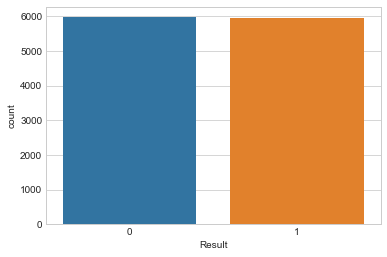

In [182]:
# 勝敗数をプロット
sns.countplot('Result',data=df_all)

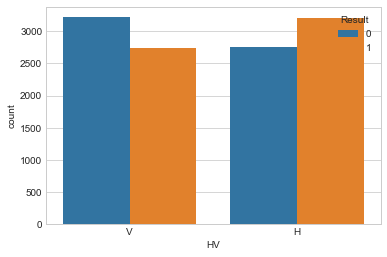

In [227]:
# HV(ホームorビジター)と試合数の関係
# 勝敗で層別化してプロット
sns.countplot('HV',data=df_all,hue='Result')

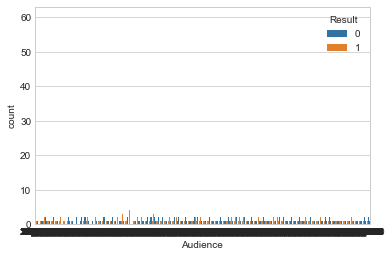

In [184]:
# Audience(動員数)と試合数の関係
# 勝敗で層別化してプロット
sns.countplot('Audience',data=df_all,hue='Result')

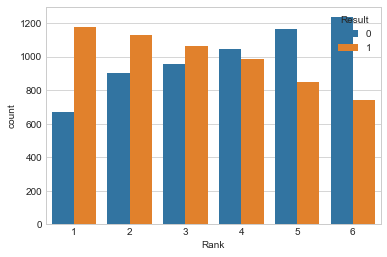

In [185]:
# Rank(順位)と試合数の関係
# 勝敗で層別化してプロット
sns.countplot('Rank',data=df_all,hue='Result')

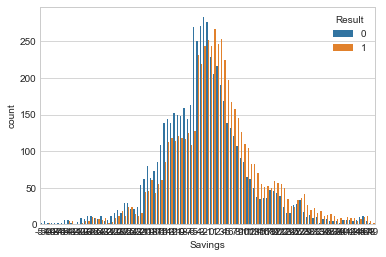

In [186]:
# Savings(貯金数)と試合数の関係
# 勝敗で層別化してプロット
sns.countplot('Savings',data=df_all,hue='Result')

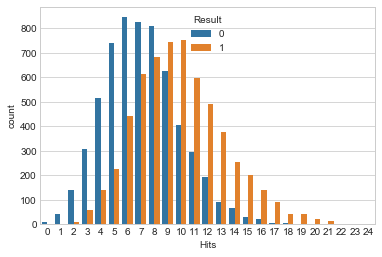

In [187]:
# Hits(安打数)と試合数の関係
# 勝敗で層別化してプロット
sns.countplot('Hits',data=df_all,hue='Result')

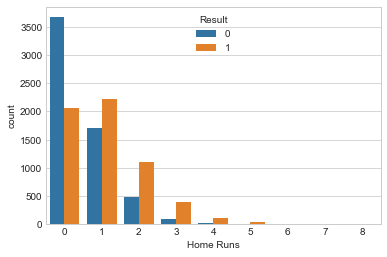

In [228]:
# Home Runs(本塁打数)と試合数の関係
# 勝敗で層別化してプロット
sns.countplot('Home Runs',data=df_all,hue='Result')

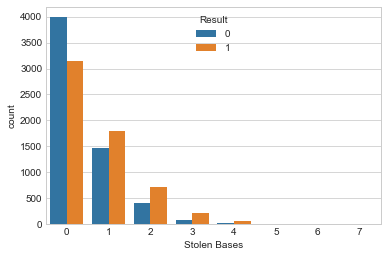

In [229]:
# Stolen Bases(盗塁数)と試合数の関係
# 勝敗で層別化してプロット
sns.countplot('Stolen Bases',data=df_all,hue='Result')

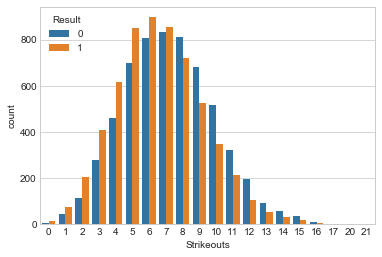

In [190]:
# Strikeouts(三振数)と試合数の関係
# 勝敗で層別化してプロット
sns.countplot('Strikeouts',data=df_all,hue='Result')

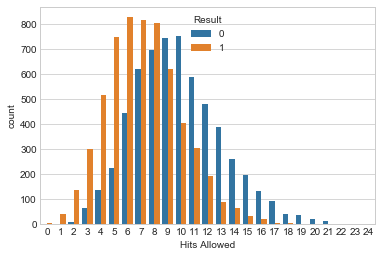

In [191]:
# Hits Allowed(被安打数)と試合数の関係
# 勝敗で層別化してプロット
sns.countplot('Hits Allowed',data=df_all,hue='Result')

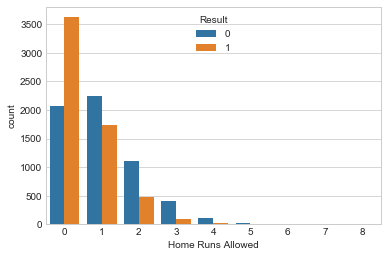

In [192]:
# Home Runs Allowed(被本塁打数)と試合数の関係
# 勝敗で層別化してプロット
sns.countplot('Home Runs Allowed',data=df_all,hue='Result')

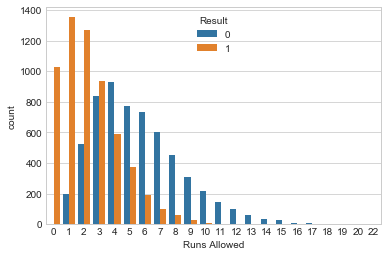

In [193]:
# Runs Allowed(失点数)と試合数の関係
# 勝敗で層別化してプロット
sns.countplot('Runs Allowed',data=df_all,hue='Result')

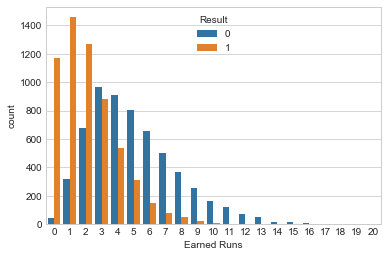

In [194]:
# Earned Runs(自責点数)と試合数の関係
# 勝敗で層別化してプロット
sns.countplot('Earned Runs',data=df_all,hue='Result')

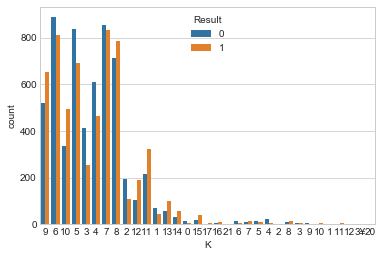

In [195]:
# K(奪三振数)と試合数の関係
# 勝敗で層別化してプロット
sns.countplot('K',data=df_all,hue='Result')

## 3. データの前処理

In [196]:
# カテゴリーを表現する変数をダミー変数に展開
hv_dummies = pd.get_dummies(df_all['HV'])
hv_dummies.head()

,H,V
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [197]:
# 行数の確認
print(len(hv_dummies))
print(len(df_all))

11914
11914


In [198]:
# 元のHV列は不要
# Resultは目的変数のため不要
# 勝敗との関係がありそうにない変数（Audience,Strikeouts,K）も不要
X = df_all.drop(['HV','Result','Audience','Strikeouts','K'],axis=1)

In [199]:
# ダミー変数を連結して説明変数のDataFrameを作成
X = pd.concat([X,hv_dummies], axis=1)

In [200]:
X.head()

,Rank,Savings,Hits,Home Runs,Stolen Bases,Hits Allowed,Home Runs Allowed,Runs Allowed,Earned Runs,H,V
0,6,-20,7,0,2,0,0,0,0,0,1
1,6,-21,12,0,1,6,0,0,0,1,0
2,6,-22,6,2,0,7,0,1,1,1,0
3,6,-23,5,1,0,4,1,1,1,1,0
4,6,-24,8,1,1,7,0,2,2,1,0


In [201]:
# Yに目的変数を格納
Y = df_all.Result
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Result, dtype: int64

In [202]:
# 目的変数をリストに変換
Y = Y.values
Y

array([1, 1, 1, ..., 0, 0, 1])

## 4. scikit-learnを使ったロジススティック回帰

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
# 性能の評価用
from sklearn import metrics

In [213]:
log_model = LogisticRegression()

In [214]:
# モデルの作成
log_model.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [215]:
# モデルの精度を確認
log_model.score(X,Y)

0.8867718650327346

In [216]:
# 変数名とその係数を格納するDataFrameを作成
coeff_df = DataFrame([X.columns, log_model.coef_[0]]).T
coeff_df

,0,1
0,Rank,-0.192293
1,Savings,-0.00346994
2,Hits,0.641333
3,Home Runs,1.30059
4,Stolen Bases,0.350525
5,Hits Allowed,0.00477064
6,Home Runs Allowed,-0.0838948
7,Runs Allowed,-1.24947
8,Earned Runs,0.0176481
9,H,-0.0931902


## 5. 学習とテスト

In [217]:
# データを学習用とテスト用に分割する
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [218]:
# 新しいモデルを作成
log_model2 = LogisticRegression()

In [219]:
# 学習用のデータだけでモデルを鍛える
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [220]:
# テスト用データを使って予測
class_predict = log_model2.predict(X_test)
class_predict

array([1, 1, 0, ..., 1, 1, 1])

In [221]:
# 精度を計算
print(metrics.accuracy_score(Y_test, class_predict))

0.8831822759315207


### →説明変数のデータが揃っている場合は、約88%の確率で勝敗予想が当たる。

### 翌日の試合結果と関係がありそうな変数を探す

In [110]:
# 2012〜2018年の全チームの試合結果DataFrameを作成する関数
# 試合結果をずらす
def combine_next_match_results():
    df_all = pd.DataFrame(index=[],columns=[])
    
    for year in years:
        for team in teams:
            # csvファイルのデータをDataFrameへ格納
            df = pd.read_csv('csv/{y}/{y}_{t}_match_results.csv'.format(y=year,t=team),
                             sep=',',names=col_header,usecols=col_num)

            # 勝敗をずらす
            df['Next Result'] = df['Result'].shift(1)
            
            # 勝敗列の削除
            df = df.drop('Result',axis=1)
            
            # 
            for i in range(len(df)):
                if df.loc[i,'Next Result'] is None or df.loc[i,'Next Result'] == '△':
                    df = df.drop(i)

            # 関数match_result_classifyを適用
            df['Next Result'] = df['Next Result'].apply(match_result_classify)

            df_all = pd.concat([df_all,df])
            
    return df_all

In [111]:
df_all = combine_next_match_results()
df_all

,HV,Audience,Rank,Savings,Hits,Home Runs,Stolen Bases,Strikeouts,Hits Allowed,Home Runs Allowed,Runs Allowed,Earned Runs,K,Next Result
0,V,"38,561",6,-20,7,0,2,11,0,0,0,0,9,None
1,H,"24,274",6,-21,12,0,1,6,6,0,0,0,6,1
2,H,"18,719",6,-22,6,2,0,7,7,0,1,1,10,1
3,H,"13,829",6,-23,5,1,0,9,4,1,1,1,5,1
4,H,"10,226",6,-24,8,1,1,6,7,0,2,2,3,1
5,V,"28,709",6,-25,9,0,1,3,9,1,4,4,4,1
6,V,"10,348",6,-24,10,2,2,4,8,0,0,0,4,0
7,H,"15,337",6,-25,7,1,0,10,9,0,0,0,7,1
8,H,"14,062",6,-26,4,0,1,7,14,0,7,6,6,1
9,V,"11,295",6,-25,3,0,0,6,10,0,5,3,5,0


In [85]:
df_all.groupby('Next Result').mean()

,Rank,Savings,Hits,Home Runs,Stolen Bases,Strikeouts,Hits Allowed,Home Runs Allowed,Runs Allowed,Earned Runs
Next Result,,,,,,,,,,
0,3.644459,-1.070501,8.484736,0.77551,0.575814,7.002867,8.576826,0.782425,3.985832,3.631641
1,3.408267,0.769100,8.556666,0.77503,0.574623,6.973065,8.461968,0.769947,3.889886,3.520752


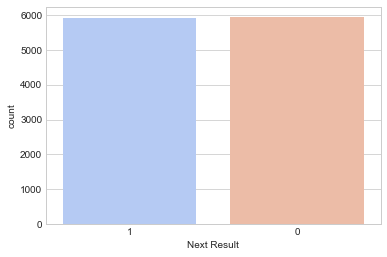

In [112]:
sns.countplot('Next Result',data=df_all,palette='coolwarm')

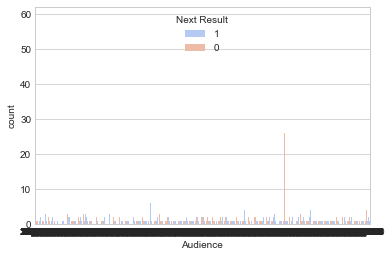

In [113]:
sns.countplot('Audience',data=df_all,hue='Next Result',palette='coolwarm')

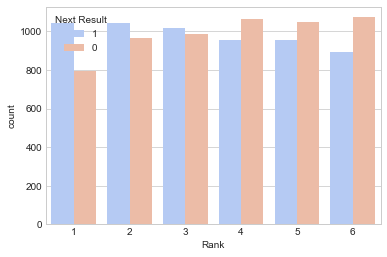

In [114]:
sns.countplot('Rank',data=df_all,hue='Next Result',palette='coolwarm')

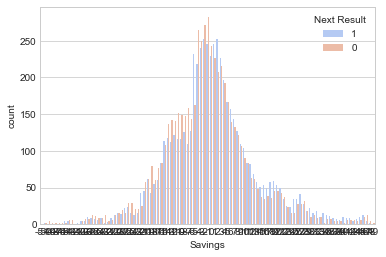

In [115]:
sns.countplot('Savings',data=df_all,hue='Next Result',palette='coolwarm')

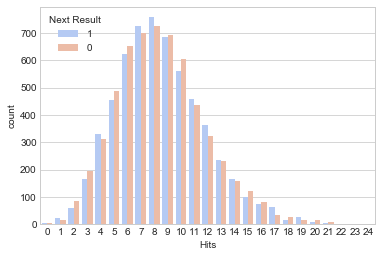

In [116]:
sns.countplot('Hits',data=df_all,hue='Next Result',palette='coolwarm')

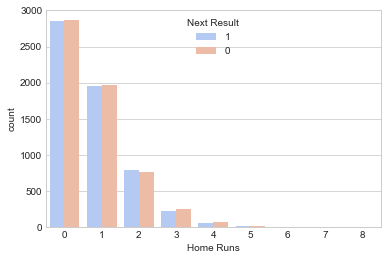

In [117]:
sns.countplot('Home Runs',data=df_all,hue='Next Result',palette='coolwarm')

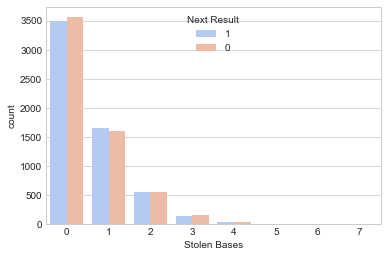

In [118]:
sns.countplot('Stolen Bases',data=df_all,hue='Next Result',palette='coolwarm')

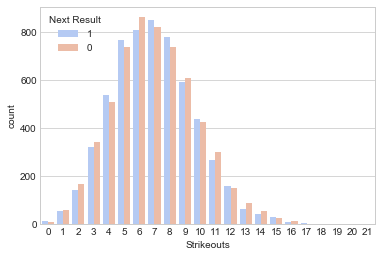

In [119]:
sns.countplot('Strikeouts',data=df_all,hue='Next Result',palette='coolwarm')

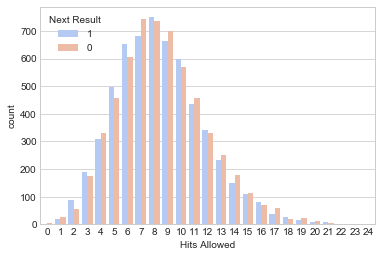

In [120]:
sns.countplot('Hits Allowed',data=df_all,hue='Next Result',palette='coolwarm')

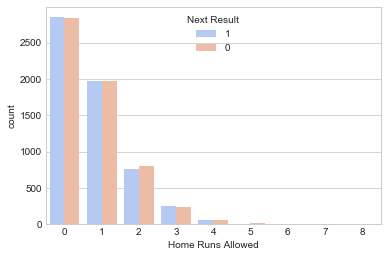

In [121]:
sns.countplot('Home Runs Allowed',data=df_all,hue='Next Result',palette='coolwarm')

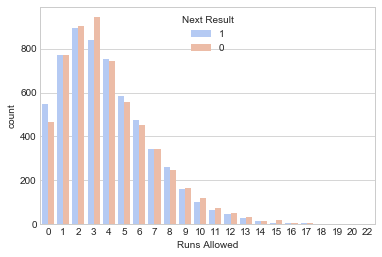

In [122]:
sns.countplot('Runs Allowed',data=df_all,hue='Next Result',palette='coolwarm')

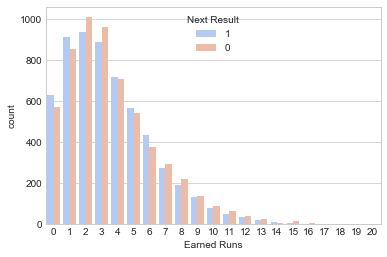

In [123]:
sns.countplot('Earned Runs',data=df_all,hue='Next Result',palette='coolwarm')

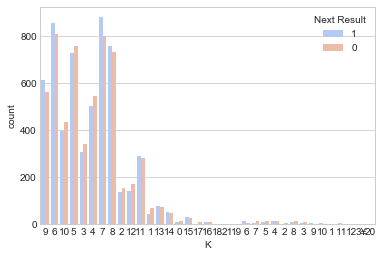

In [124]:
sns.countplot('K',data=df_all,hue='Next Result',palette='coolwarm')